# Metoda Monte Carlo dla równania Laplace'a

> Projekt nr 13, Wiktor Flis

Problem brzegowy

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [7]:
# funkcje dla ruchow po siatce roznicowej, sprawdzajace warunki zakonczenia symulacji oraz przeprowadzajace pojedyncza symulacje

def move(pos, discrete_step):
    x,y = pos
    axis = random.choice([0,1])
    
    if ( axis == 0 ):
        x += discrete_step*random.choice([-1,1])
    if ( axis == 1):
        y += discrete_step*random.choice([-1,1])
    return (x, y)

def check_exit(pos, L_range):
    x,y = pos
    
    if x < L_range[0] or x > L_range[1]:
        return 0
    if y < L_range[0] or y > L_range[1]:
        return 0
    
    if x >= int(L_range[1]/2) and y >= int(L_range[1]/2):
        return 2
    
    if x <= L_range[0] or x >= L_range[1] or y <= L_range[0] or y >= L_range[1]:
        return 2
    
    return 1

def single_exit(position=None, L_range=(0,10), max_steps=50, discrete_step=1):
    if not position or len(position) != 2:
        position = [np.random.uniform(x_range[0], x_range[1]), np.random.uniform(y_range[0], y_range[1])]
    
    position_tracker = [position]
    
    for step in range(max_steps):
        position = move(position, discrete_step)
        position_tracker.append(position)
        survives = check_rules(position, L_range)
        if survives == 0 or survives == 2:
            break
    
    return position_tracker, position, survives

In [8]:
# funkcje rysujace wykresy

def init_plot():
    plt.figure(dpi=450)
    plt.plot([0,0,5,5,10,10,0],[0,10,10,5,5,0,0],'k--')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    
def draw_path(walk_path):
    x, y = zip(*walk_path)
    
    plt.plot(x, y)
    plt.scatter(x[-1], y[-1],marker='x',c='r', s=200);
    plt.plot([0,0,5,5,10,10,0],[0,10,10,5,5,0,0],'k--')
    plt.xlabel("X")
    plt.ylabel("Y")

In [13]:
# funkcja warunku brzegowego Dirichleta (dla punktu s = (x,y) i zadanej dlugosci L)

def u_o(s, L):
    x,_ = s
    
    if x <= 5:
        return L
    if x > L:
        return 0
    if x > 5 and x <= L:
        return int(L/2)

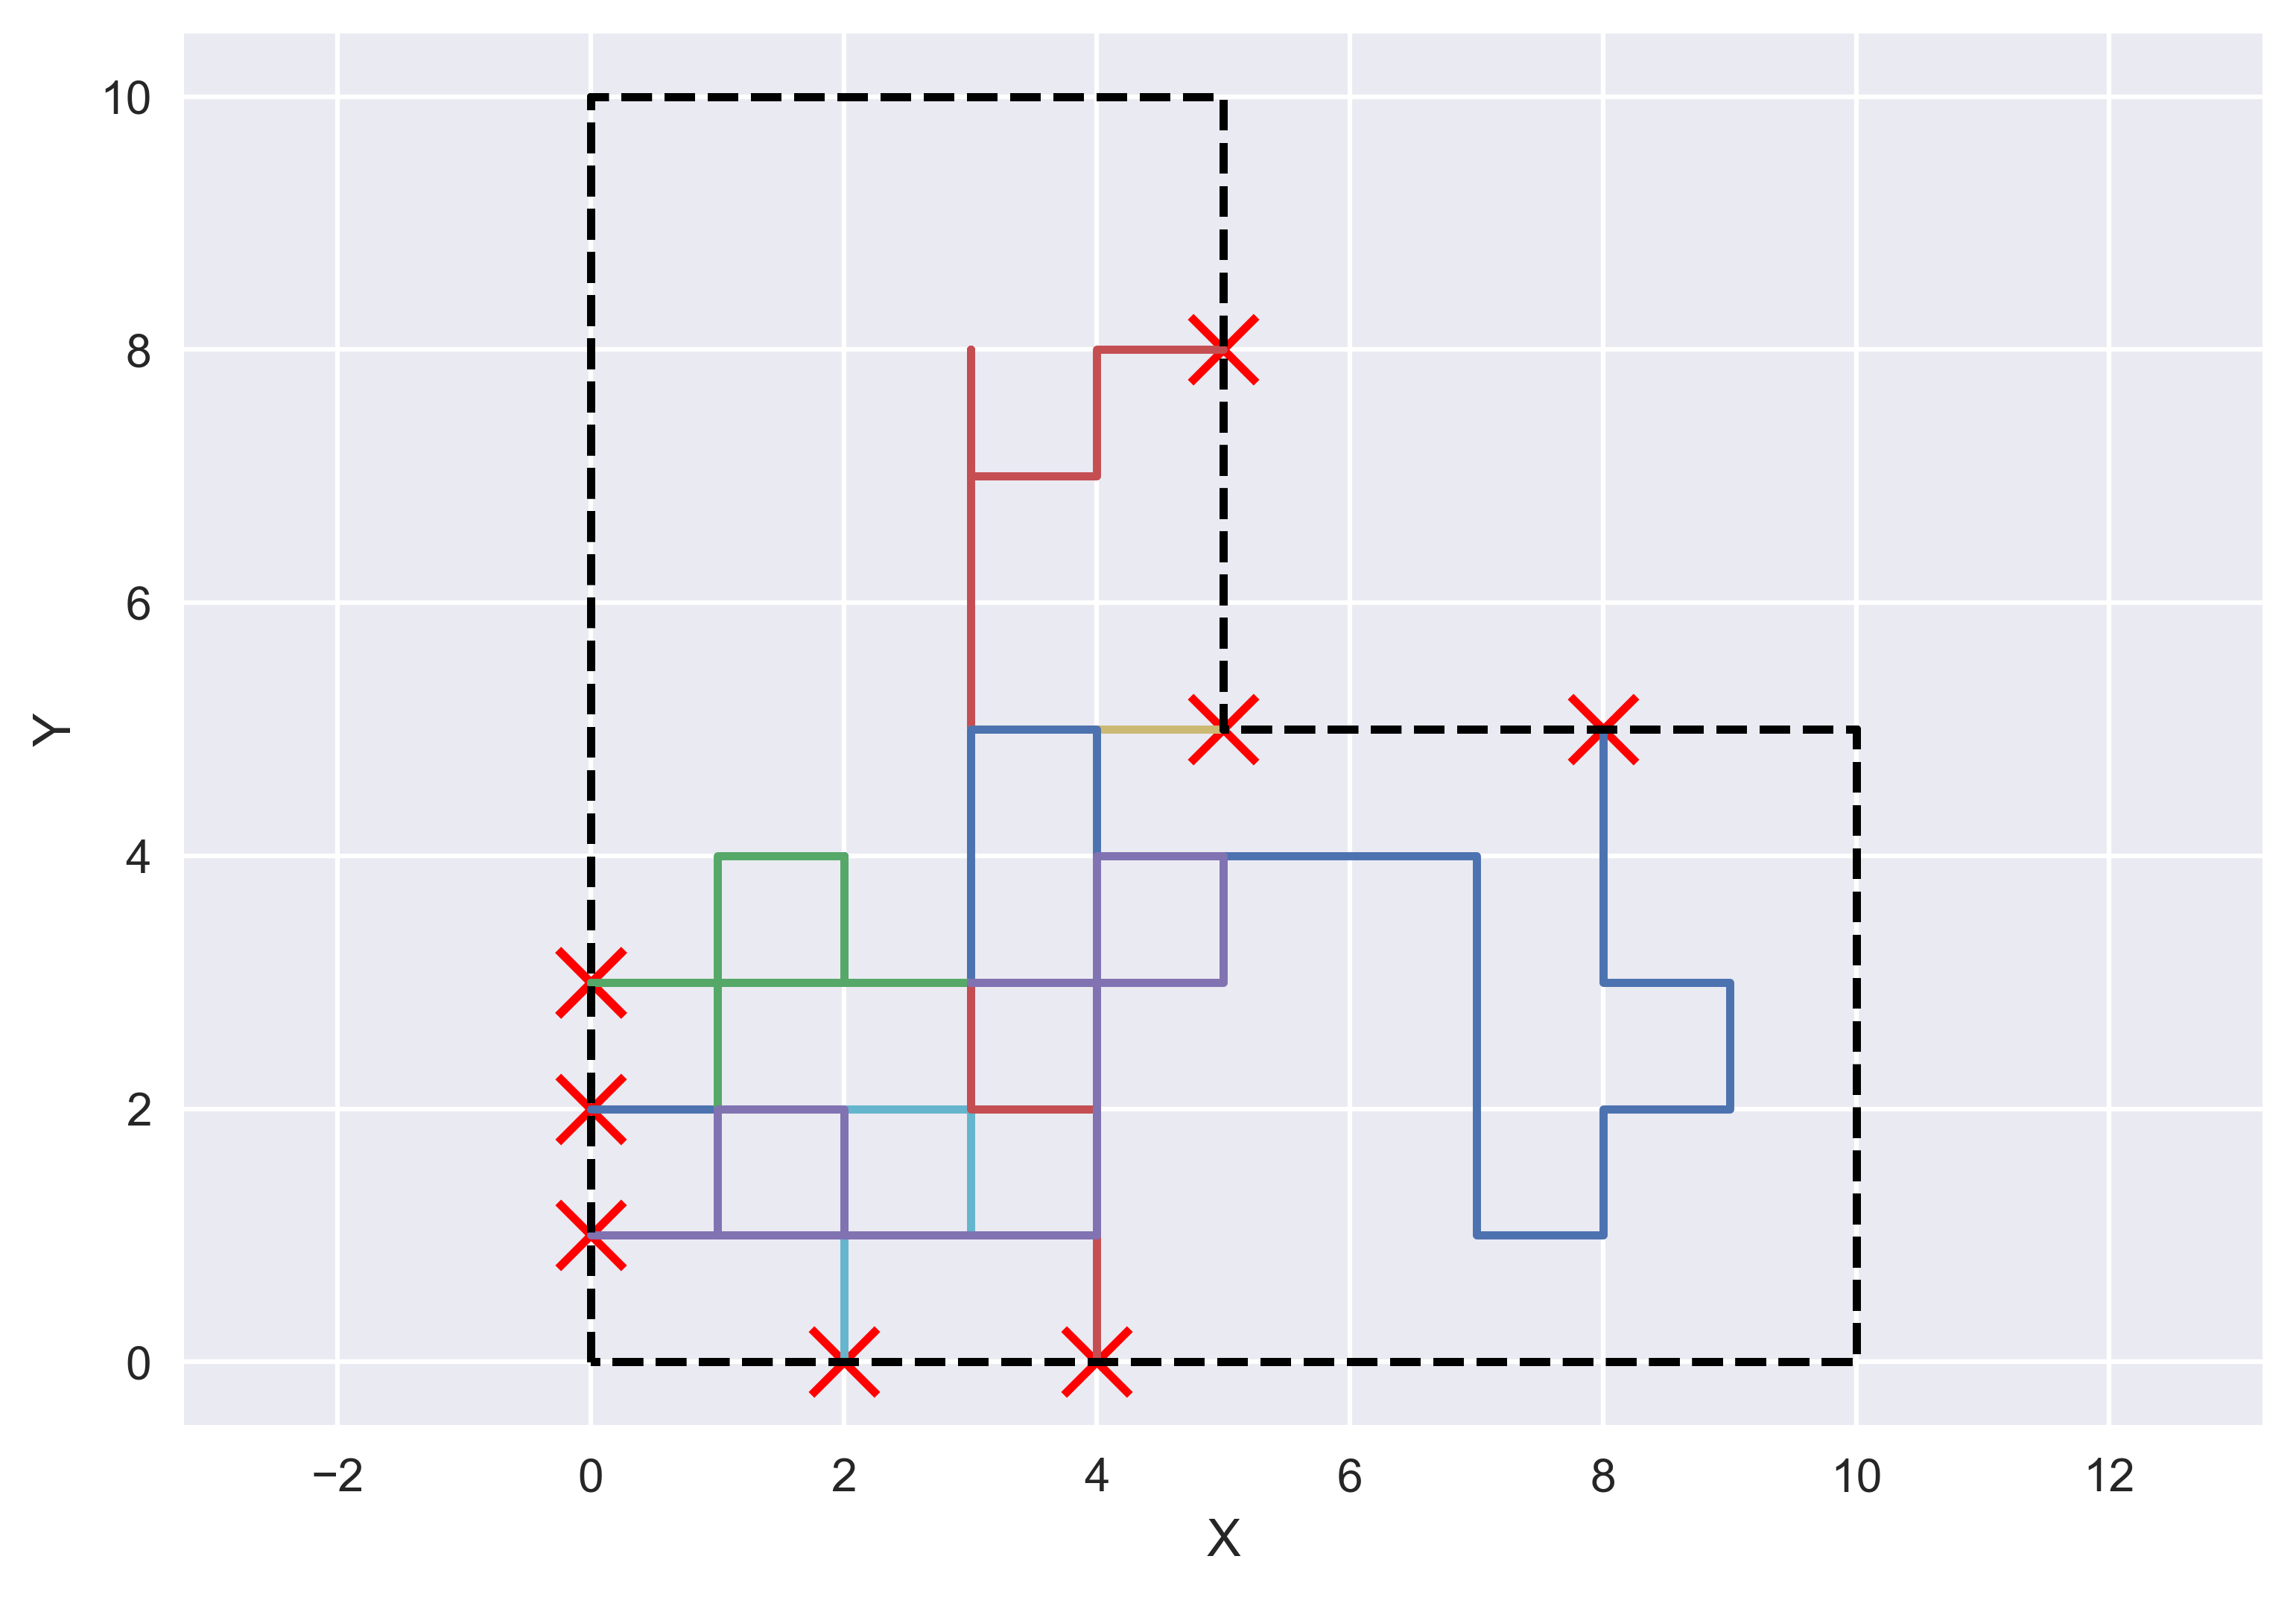

In [10]:
number_of_walkers = 10
start_node = (3,3)
paths = []
results = {}
for walker in range(number_of_walkers):
    walk_path, final_pos, result = single_experiment(position=start_node, max_steps=100)
    if result == 2:
        paths.append(walk_path)
        results[str(final_pos)] = 1 + results.get(str(final_pos), 0)
        
# rysowanie obszaru omega oraz wszystkich sciezek
init_plot()
for w in paths:
    draw_path(w)

{'(5, 6)': 31, '(5, 8)': 10, '(9, 5)': 3, '(4, 0)': 53, '(0, 6)': 28, '(0, 8)': 9, '(0, 5)': 43, '(4, 10)': 4, '(3, 0)': 79, '(5, 5)': 172, '(0, 4)': 68, '(7, 5)': 19, '(1, 0)': 33, '(8, 5)': 10, '(0, 1)': 36, '(5, 0)': 38, '(0, 3)': 79, '(5, 7)': 23, '(2, 0)': 46, '(0, 2)': 52, '(6, 0)': 28, '(7, 0)': 25, '(10, 4)': 5, '(6, 5)': 37, '(0, 7)': 20, '(1, 10)': 5, '(9, 0)': 3, '(0, 9)': 7, '(8, 0)': 10, '(10, 2)': 9, '(5, 9)': 2, '(10, 1)': 2, '(3, 10)': 5, '(10, 3)': 5, '(2, 10)': 1}
